In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [28]:
train_input=pd.read_csv("Credit_Risk_Train_data.csv")
validate_input=pd.read_csv("Credit_Risk_Validate_data.csv")

In [29]:
print(train_input.columns)
print(validate_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [30]:
#last column has a different name in both
#lets make the name same
#so that we can fill the missing values
validate_input.rename(columns={"outcome":"Loan_Status"},inplace=True)

In [31]:
data_all=pd.concat([train_input,validate_input],ignore_index=True)
data_all.shape

(981, 13)

In [32]:
data_all.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


## Exploratory Data Analysis (EDA)

### Missing Value Preprocessing

<AxesSubplot:>

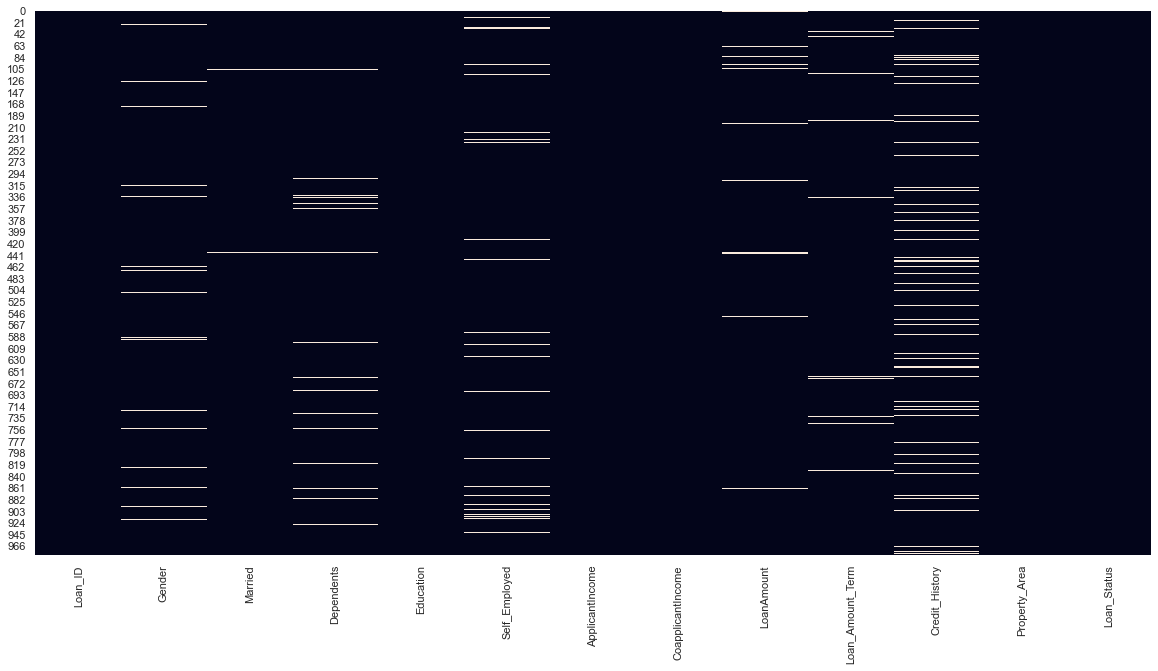

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data_all.isnull(), cbar=False)

In [34]:
data_all.isnull().sum() #give missing values

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

#### NaN Fill with Mode

In [36]:
Counter(data_all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [38]:
data_all.fillna({'Gender':'Male'},inplace=True)

In [40]:
#check if filed
Counter(data_all['Gender'])

Counter({'Male': 799, 'Female': 182})

In [42]:
#lets fill married now
print(Counter(data_all['Married']))

Counter({'Yes': 631, 'No': 347, nan: 3})


In [44]:
data_all.fillna({'Married':'Yes'},inplace=True)

In [46]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

#### NaN fill with crosstab

In [48]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [50]:
#lets see the dependents wrt marriage
pd.crosstab(data_all['Married'],data_all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [52]:
pd.crosstab(data_all['Dependents'],data_all['Married'])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [54]:
#for the bachelors, lets fill the missing dependents as 0
#lets find the index with dependents missing and married No
bachelor_nulldependent= data_all[(data_all['Married']=="No") &
                                (data_all['Dependents'].isnull())].index.tolist()
print(bachelor_nulldependent)

[293, 332, 355, 597, 684, 752, 879, 916, 926]


In [56]:
data_all['Dependents'].iloc[bachelor_nulldependent]='0'

In [58]:
Counter(data_all['Dependents'])

Counter({'0': 554, '1': 160, '2': 160, '3+': 91, nan: 16})

In [61]:
#for the remaining 16 missing dependents
#let see how many dependents male and female have
pd.crosstab(data_all['Gender'],data_all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [63]:
#lets see the gender of the 16 missing dependents
pd.crosstab(data_all['Gender'],data_all['Dependents'].isnull())

Dependents,False,True
Gender,,
Female,181,1
Male,784,15


In [65]:
pd.crosstab((data_all['Gender']=='Male')&
           (data_all['Married']=='Yes'), data_all['Dependents'])

Dependents,0,1,2,3+
row_0,,,,
False,318,48,23,15
True,236,112,137,76


In [67]:
#lets fill the dependent with 1
data_all['Dependents'].iloc[data_all[data_all['Dependents'].isnull()
                           ].index.tolist()]="1"

In [69]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [73]:
data_all.fillna({'Self_Employed':'No'},inplace=True)

In [75]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

#### NaN fill with Mean

In [77]:
#to check if any with both loanAmount and Loan_Amount_Term as NaN
pd.crosstab(data_all['LoanAmount'].isnull(),
           data_all['Loan_Amount_Term'].isnull())

Loan_Amount_Term,False,True
LoanAmount,,
False,934,20
True,27,0


In [79]:
pd.crosstab(data_all['LoanAmount'].isnull(),data_all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [81]:
data_all.groupby(data_all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [84]:
#lets fill the missing values in LoanAmount
#with mean of repective Loan_Term
#we see that 180 & 240 has almost same loan amount 128-131 & 360 has high i.e 144
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())
                      & (data_all['Loan_Amount_Term']==360)]=144

data_all['LoanAmount'][(data_all['LoanAmount'].isnull())
                      & (data_all['Loan_Amount_Term']==480)]=137

In [86]:
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())]=130

In [88]:
#lets fill loan Amount Term
(data_all['Loan_Amount_Term']).value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [90]:
#lets fill the loan Tenure by the mode i.e 360
data_all['Loan_Amount_Term'][data_all['Loan_Amount_Term'].isnull()]=360

In [92]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
data_all['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [96]:
data_all.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.547235,-0.023823,0.023378
CoapplicantIncome,-0.114247,1.000000,0.178476,-0.042750,-0.027253
LoanAmount,0.547235,0.178476,1.000000,0.054260,-0.008206
Loan_Amount_Term,-0.023823,-0.042750,0.054260,1.000000,-0.023204
Credit_History,0.023378,-0.027253,-0.008206,-0.023204,1.000000


In [98]:
pd.crosstab(data_all['Gender'],data_all['Credit_History'])#Gender make no diff

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,118,619


In [100]:
pd.crosstab(data_all['Self_Employed'],data_all['Credit_History'])

Credit_History,0.0,1.0
Self_Employed,,
No,134,658
Yes,14,96


In [102]:
pd.crosstab(data_all['Education'],data_all['Credit_History'])

Credit_History,0.0,1.0
Education,,
Graduate,106,596
Not Graduate,42,158


In [104]:
pd.crosstab(data_all['Married'],data_all['Credit_History'])

Credit_History,0.0,1.0
Married,,
No,56,263
Yes,92,491


In [106]:
data_all.fillna({'Credit_History':1},inplace=True)

In [107]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64